In [1]:
import pandas as pd
print("Hello Sara, project started successfully! 🎉")


Hello Sara, project started successfully! 🎉


In [3]:
import pandas as pd
import numpy as np

# thoda sample data banate hain
data = {
    'CustomerID': [f'C{i}' for i in range(1, 11)],
    'Gender': np.random.choice(['Male', 'Female'], 10),
    'Age': np.random.randint(18, 60, 10),
    'Tenure_Months': np.random.randint(1, 48, 10),
    'MonthlyCharges': np.random.randint(300, 1200, 10),
    'Churn': np.random.choice(['Yes', 'No'], 10)
}

df = pd.DataFrame(data)

# save karte hain file me
df.to_csv('sample_customer_data.csv', index=False)

# file dekhte hain
df


,CustomerID,Gender,Age,Tenure_Months,MonthlyCharges,Churn
0,C1,Female,48,9,701,No
1,C2,Female,21,3,1003,No
2,C3,Male,45,15,737,No
3,C4,Female,30,3,1049,Yes
4,C5,Female,35,30,688,Yes
5,C6,Male,20,33,628,Yes
6,C7,Male,46,5,886,Yes
7,C8,Female,29,24,519,No
8,C9,Female,35,19,389,No
9,C10,Male,25,40,580,No


In [4]:
# Let's read our saved file again
import pandas as pd
df = pd.read_csv('sample_customer_data.csv')

# 1️⃣ See first few rows
print("🔹 First 5 rows:")
display(df.head())

# 2️⃣ See number of rows and columns
print("\n🔹 Shape (rows, columns):", df.shape)

# 3️⃣ Check column names and data types
print("\n🔹 Info:")
print(df.info())

# 4️⃣ Quick summary statistics
print("\n🔹 Summary statistics:")
display(df.describe())


🔹 First 5 rows:


,CustomerID,Gender,Age,Tenure_Months,MonthlyCharges,Churn
0,C1,Female,48,9,701,No
1,C2,Female,21,3,1003,No
2,C3,Male,45,15,737,No
3,C4,Female,30,3,1049,Yes
4,C5,Female,35,30,688,Yes



🔹 Shape (rows, columns): (10, 6)

🔹 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      10 non-null     object
 1   Gender          10 non-null     object
 2   Age             10 non-null     int64 
 3   Tenure_Months   10 non-null     int64 
 4   MonthlyCharges  10 non-null     int64 
 5   Churn           10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes
None

🔹 Summary statistics:


,Age,Tenure_Months,MonthlyCharges
count,10.000000,10.000000,10.000000
mean,33.400000,18.100000,718.000000
std,10.254538,13.328749,209.641493
min,20.000000,3.000000,389.000000
25%,26.000000,6.000000,592.000000
50%,32.500000,17.000000,694.500000
75%,42.500000,28.500000,848.750000
max,48.000000,40.000000,1049.000000


In [5]:
# Check if there are any missing (NaN) values in the dataset
print("🔹 Missing values in each column:")
print(df.isnull().sum())


🔹 Missing values in each column:
CustomerID        0
Gender            0
Age               0
Tenure_Months     0
MonthlyCharges    0
Churn             0
dtype: int64


In [6]:
# 1️⃣ How many customers churned vs stayed
print("🔹 Churn value counts:")
print(df['Churn'].value_counts())

# 2️⃣ What percentage churned?
churn_rate = (df['Churn'].value_counts(normalize=True) * 100).round(2)
print("\n🔹 Churn percentage:")
print(churn_rate)

# 3️⃣ Average monthly charge and tenure
print("\n🔹 Average Monthly Charges:", df['MonthlyCharges'].mean())
print("🔹 Average Tenure (months):", df['Tenure_Months'].mean())

# 4️⃣ Unique values in Gender column
print("\n🔹 Gender unique values:", df['Gender'].unique())



🔹 Churn value counts:
Churn
No     6
Yes    4
Name: count, dtype: int64

🔹 Churn percentage:
Churn
No     60.0
Yes    40.0
Name: proportion, dtype: float64

🔹 Average Monthly Charges: 718.0
🔹 Average Tenure (months): 18.1

🔹 Gender unique values: ['Female' 'Male']


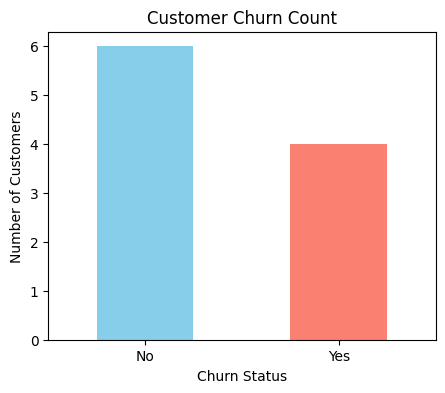

In [7]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(5,4))

# Create a simple bar chart for Churn counts
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Add labels and title
plt.title("Customer Churn Count")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)

# Show the chart
plt.show()


C:\Users\fatma\AppData\Local\Temp\ipykernel_1280\221191296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


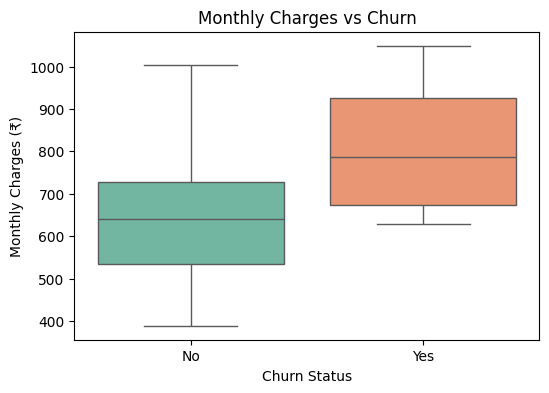

In [8]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')

plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges (₹)")
plt.show()


In [9]:
# 1️⃣ Create 'HighCharges' column - to mark customers who pay above average
average_charge = df['MonthlyCharges'].mean()
df['HighCharges'] = df['MonthlyCharges'].apply(lambda x: 'Yes' if x > average_charge else 'No')

# 2️⃣ Create 'CustomerAgeGroup' - to separate young & old customers
df['CustomerAgeGroup'] = df['Age'].apply(lambda x: 'Young' if x < 30 else ('Middle' if x < 50 else 'Senior'))

# 3️⃣ Check first few rows to confirm new columns added
df.head()


,CustomerID,Gender,Age,Tenure_Months,MonthlyCharges,Churn,HighCharges,CustomerAgeGroup
0,C1,Female,48,9,701,No,No,Middle
1,C2,Female,21,3,1003,No,Yes,Young
2,C3,Male,45,15,737,No,Yes,Middle
3,C4,Female,30,3,1049,Yes,Yes,Middle
4,C5,Female,35,30,688,Yes,No,Middle


In [10]:
# 1️⃣ Churn by Age Group
print("🔹 Churn Rate by Customer Age Group:")
print(df.groupby('CustomerAgeGroup')['Churn'].value_counts(normalize=True).unstack().round(2) * 100)

# 2️⃣ Churn by HighCharges
print("\n🔹 Churn Rate by HighCharges (above/below average monthly bill):")
print(df.groupby('HighCharges')['Churn'].value_counts(normalize=True).unstack().round(2) * 100)


🔹 Churn Rate by Customer Age Group:
Churn               No   Yes
CustomerAgeGroup            
Middle            50.0  50.0
Young             75.0  25.0

🔹 Churn Rate by HighCharges (above/below average monthly bill):
Churn          No   Yes
HighCharges            
No           67.0  33.0
Yes          50.0  50.0


In [11]:
# Save the cleaned & enriched dataset
df.to_csv('cleaned_customer_data.csv', index=False)

print("✅ Cleaned file saved successfully as 'cleaned_customer_data.csv'")


✅ Cleaned file saved successfully as 'cleaned_customer_data.csv'
